# 6. Evaluación del punto de mejor punto de corte 


Dibujamos cada una de las curvas ROC  de los modelos anteriormente ajustados.

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



# generate 2 class dataset

In [2]:
dataframe = pd.read_csv('./CSV/csv_precio_div.csv')
features=['Rooms','Distance','Bathroom','Landsize','Lattitude','Longtitude']
X = dataframe[features]
y = dataframe['precio_div']
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]


### Regresión Logística 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.839


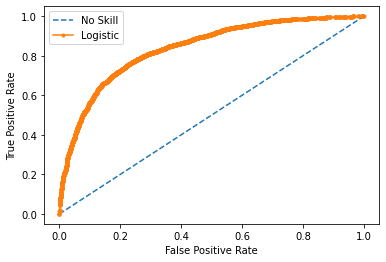

In [3]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### SVM

In [4]:
# fit a model
model=SVC(C=50,gamma=1,kernel='rbf', probability=True )
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Decision Tree

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.915


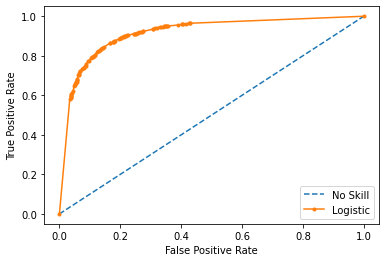

In [5]:
# fit a model
model=DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=5)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### KNN

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.794


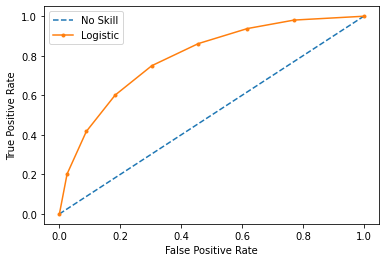

In [6]:
# fit a model
model=KNeighborsClassifier(n_neighbors=7)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Random Forest 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.950


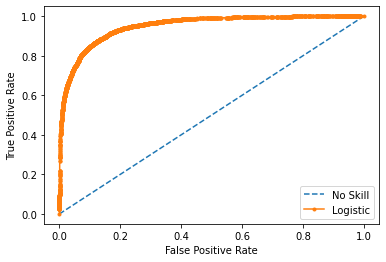

In [50]:
# fit a model
model =RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=5)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

El modelo con  mejores resultados fue el de random forest  con un  AUC de 0.948 y por lo tanto con mejor exatitud  en la prediccion de los datos de test. 

## 6.1. Elección del mejor punto de corte.

Vamos a elegir el mejor punto de corte para asegurarnos que  mas del 80% de verdaderos positivos sin superar el 20% de falsos negativos. 
Como indicamos en el objetivo de la práctica nuestro principal interés es casas baratas. 

In [56]:
import pylab as pl

fpr, tpr, thresholds =roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]



Area under the ROC curve : 0.949930


,fpr,tpr,1-fpr,tf,thresholds
1145,0.125468,0.87443,0.874532,-0.000101,0.495932


[]

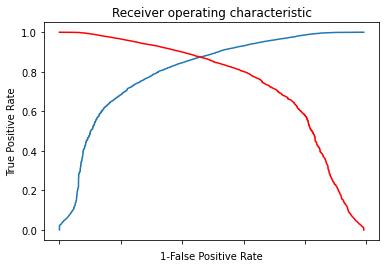

In [57]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

Best Threshold=0.513393, G-Mean=0.875


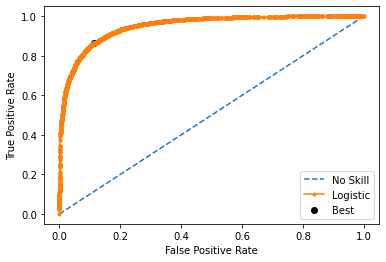

In [33]:

# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, lr_probs)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [10]:
for eps in [0.12,0.15,0.17,0.2,0.25,0.3,0.4,0.5,0.7]:
    y_t=(model.predict_proba(testX)[:,1]>eps).astype(int)
    print(eps, 'accuracy', accuracy_score(y_t,testy))

0.12 accuracy 0.7653089498476032
0.15 accuracy 0.788676457005634
0.17 accuracy 0.8006834764939503
0.2 accuracy 0.8189710907915396
0.25 accuracy 0.8385517687263323
0.3 accuracy 0.8517594901634802
0.4 accuracy 0.8687540408238663
0.5 accuracy 0.8780825713494043
0.7 accuracy 0.8495428096425602


Aplicamos diferentes técnicas para encontrar el mejor punto de corte. Sin embargo, finalmente hacemos un escalado de diferentes puntos para ver cual se ajusta mejor a nuestro objetivo. 
El mejor punto de corte para el objetivo marcado es 0.17, ya que no alcanzamos el 20% de falsos negativos y aseguramos un 80% de Verdaderos positivos, casas que realmente están clasificadas como baratas. 

## 6.2 Validación del Modelo 


Validamos el modelo selecionado de Random Forest, ya entrenado con los datos de train, con los datos de validación que apartamos de conjunto inicial para comprobar los resutados del modelo sobre unos datos que  nunca han sido validados. Teniendo en cuenta el punto de corte de 0.17. 


In [59]:
validation = pd.read_csv('./CSV/csv_precio_div_validation.csv')
features=['Rooms','Distance','Bathroom','Landsize','Lattitude','Longtitude']
X_val = validation[features]
y_val = validation['precio_div']
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]


/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.

/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.

/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.

/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.942


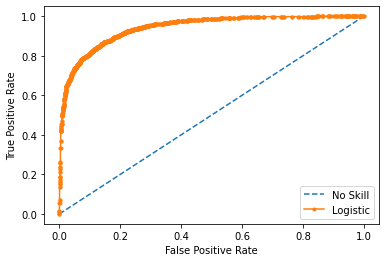

In [67]:
# fit a model
model =RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=5, min_impurity_split=0.17)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Como conclusión, podemos indicar que el modelo con mejores resultados para estos datos es el de Random forest ya que obtenemos un resultado muy bueno incluso sobre los datos de validación. 
